In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

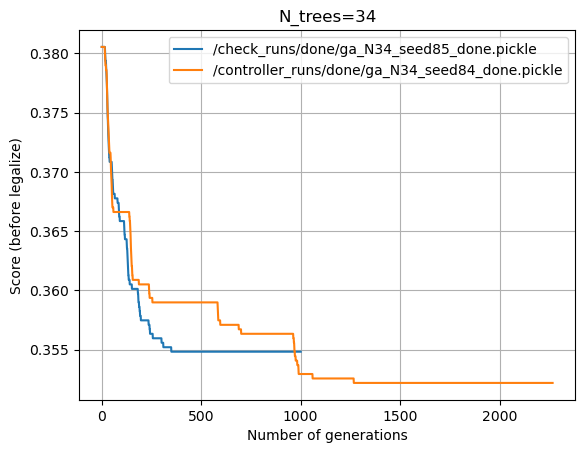

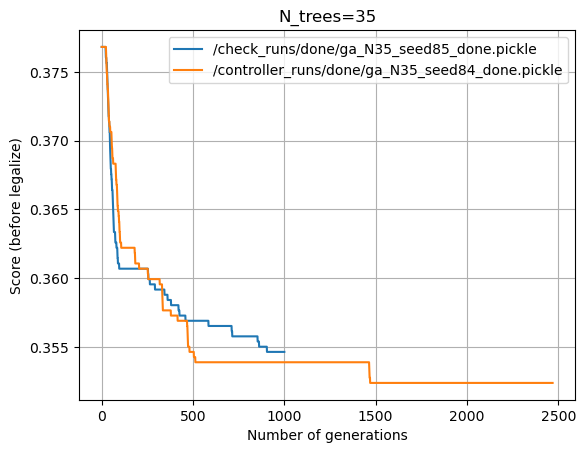

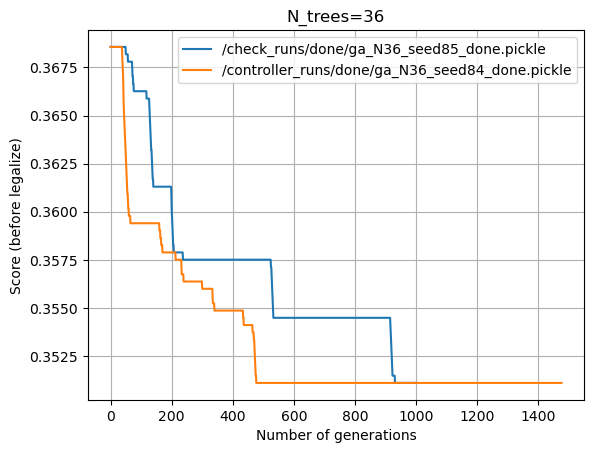

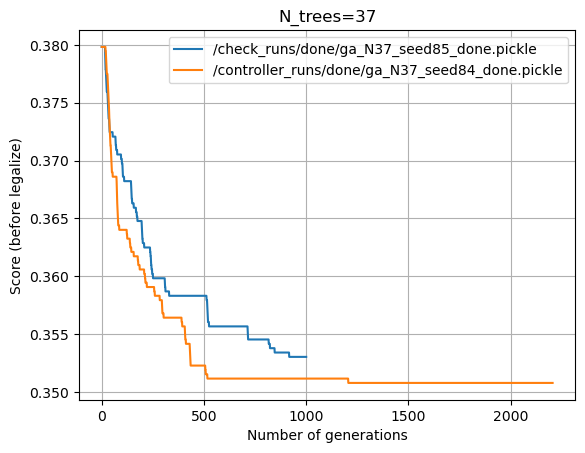

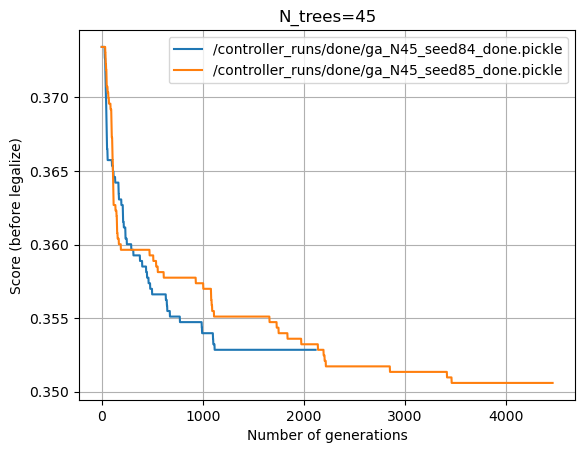

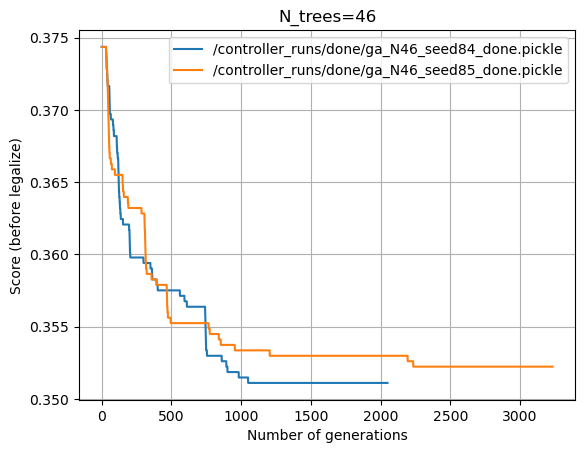

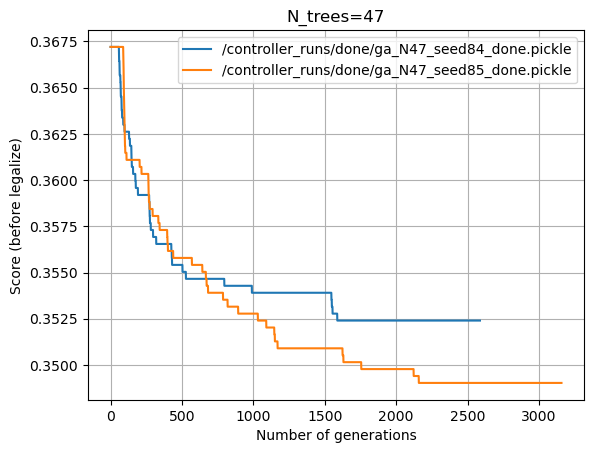

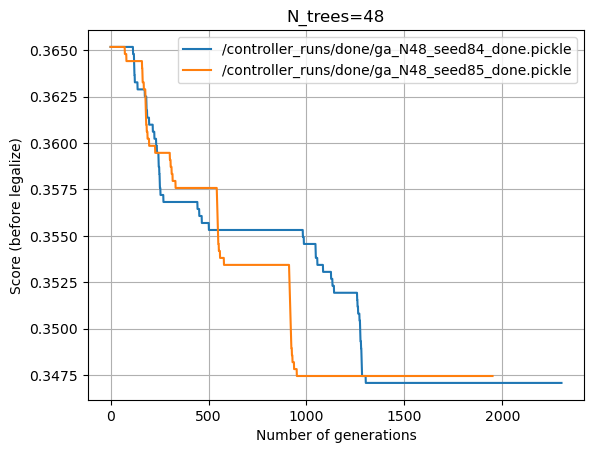

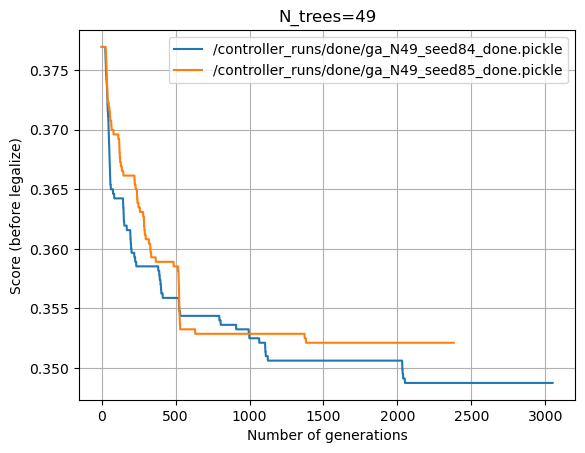

In [2]:
import numpy as np
import glob
for N_trees in np.arange(1,201):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>1:
        plt.figure()
        for f in files:
            dat = kgs.dill_load(f)
            plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=f[20:])
        plt.title(f'N_trees={N_trees}')
        plt.legend()
        plt.xlabel('Number of generations')
        plt.ylabel('Score (before legalize)')
        plt.grid()

In [3]:
dat.ga.best_costs_per_generation

[[array([0.37693566, 2.5208788 ], dtype=float32),
  array([0.37693566, 0.17778474], dtype=float32),
  array([0.37693566, 0.05428046], dtype=float32),
  array([0.37693566, 0.03562005], dtype=float32),
  array([0.37693566, 0.020988  ], dtype=float32),
  array([0.37693566, 0.01566011], dtype=float32),
  array([0.37693566, 0.01333801], dtype=float32),
  array([0.37693566, 0.01040154], dtype=float32),
  array([0.37693566, 0.00673961], dtype=float32),
  array([0.37693566, 0.00548078], dtype=float32),
  array([0.37693566, 0.0046688 ], dtype=float32),
  array([0.37693566, 0.0031561 ], dtype=float32),
  array([0.37693566, 0.00225502], dtype=float32),
  array([0.37693566, 0.00179316], dtype=float32),
  array([0.37693566, 0.00137257], dtype=float32),
  array([0.37693566, 0.00090566], dtype=float32),
  array([0.37693566, 0.00085542], dtype=float32),
  array([0.37693566, 0.00071306], dtype=float32),
  array([0.37693566, 0.00050958], dtype=float32),
  array([0.37693566, 0.00048603], dtype=float32),
